<a href="https://colab.research.google.com/github/Arathy-Palackal/Data-Science-Management/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
## Read dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#Get required data
data.drop(columns = ['User ID'], inplace = True)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
## describe data
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: xlabel='EstimatedSalary', ylabel='Count'>

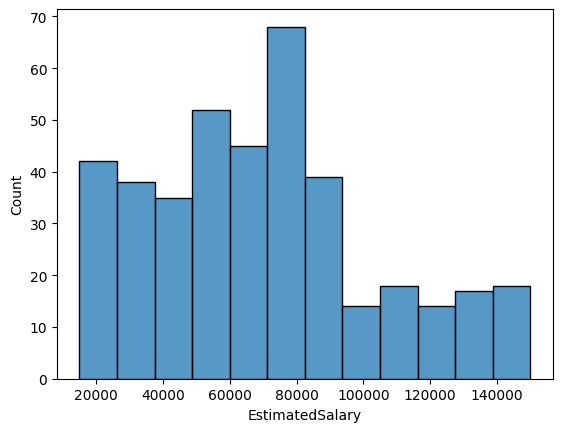

In [ ]:
## Salary distribution
sns.histplot(data['EstimatedSalary'])

In [ ]:
## Label encoding
le = LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


                   Gender       Age  EstimatedSalary  Purchased
Gender           1.000000 -0.073741        -0.060435  -0.042469
Age             -0.073741  1.000000         0.155238   0.622454
EstimatedSalary -0.060435  0.155238         1.000000   0.362083
Purchased       -0.042469  0.622454         0.362083   1.000000


<Axes: >

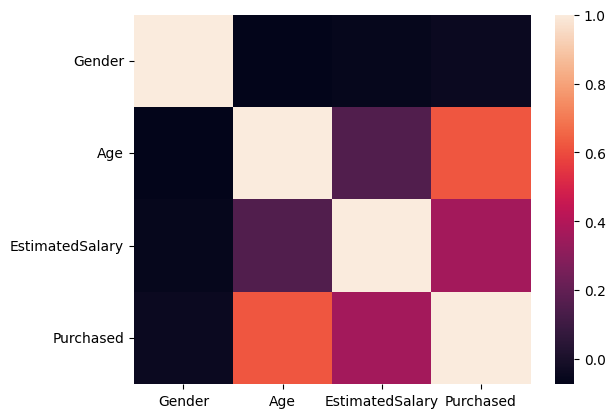

In [ ]:
##Correlation Matrix
print(data.corr())
sns.heatmap(data.corr())

In [ ]:
## Drop Gender column
data.drop(columns=['Gender'], inplace = True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
##Split data into dependent/independent variables
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
# Split data into test/train set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state= True)

In [ ]:
#Scale dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:
#Classifier
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
##Prediction
y_pred = classifier.predict(x_test)
print(y_pred)
# print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[0 0 1 ... 0 1 0]


In [ ]:
## Accuracy
accuracy_score(y_test,y_pred)

0.86

In [ ]:
# Classification Report
print(f'Classification Report: \n{classification_report(y_test,y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [ ]:
#F1 Score
print(f"F1 Score : {f1_score(y_test,y_pred)}")

F1 Score : 0.8333333333333334


<Axes: >

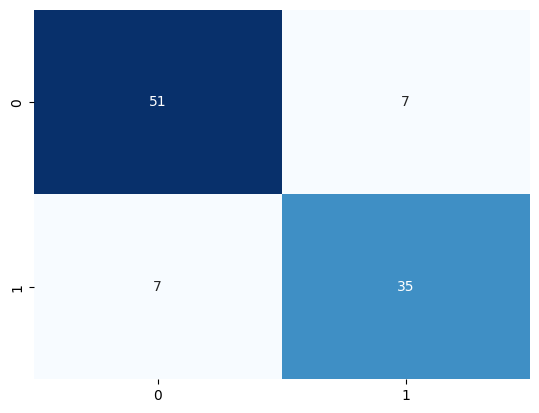

In [ ]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot = True, fmt= 'd', cmap='Blues', cbar= False)

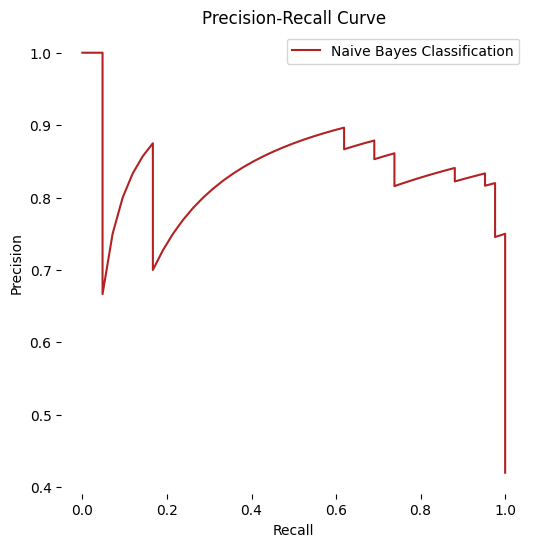

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();

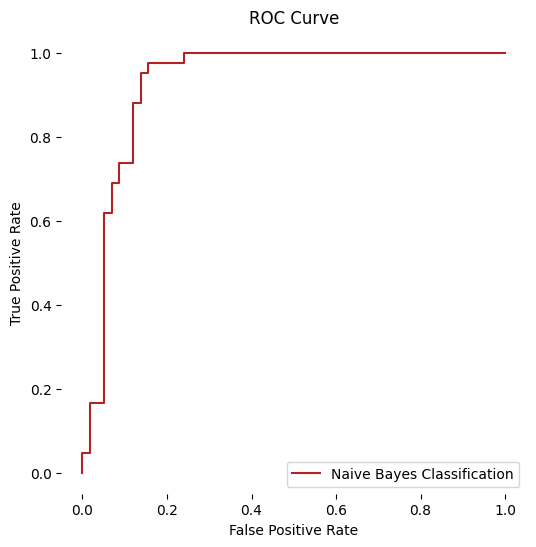

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

In [ ]:
# Predict purchase with Age(45) and Salary(97000)
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


### HOUSING DATA

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [53]:
##Reading dataset
data1 = pd.read_csv('/content/drive/MyDrive/Datasets/bank-full.csv')
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [54]:
##Get required data
data1.drop(columns=['contact','poutcome','day','month','pdays'],inplace = True)
data1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,0,no
4,33,unknown,single,unknown,no,1,no,no,198,1,0,no


In [55]:
data1.describe()

,age,balance,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,0.580323
std,10.618762,3044.765829,257.527812,3.098021,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,275.000000


In [56]:
##Label Encoding
le = LabelEncoder()
data1['job'] = le.fit_transform(data1['job'])
data1['marital'] = le.fit_transform(data1['marital'])
data1['education'] = le.fit_transform(data1['education'])
data1['default'] = le.fit_transform(data1['default'])
data1['housing'] = le.fit_transform(data1['housing'])
data1['loan'] = le.fit_transform(data1['loan'])
#data1['month'] = le.fit_transform(data1['month'])
data1['Target'] = le.fit_transform(data1['Target'])
data1.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,Target
0,58,4,1,2,0,2143,1,0,261,1,0,0
1,44,9,2,1,0,29,1,0,151,1,0,0
2,33,2,1,1,0,2,1,1,76,1,0,0
3,47,1,1,3,0,1506,1,0,92,1,0,0
4,33,11,2,3,0,1,0,0,198,1,0,0


                age       job   marital  education   default   balance  \
age        1.000000 -0.021868 -0.403240  -0.106807 -0.017879  0.097783   
job       -0.021868  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.403240  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.106807  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.097783  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.185513 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan      -0.015655 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
duration  -0.004648  0.004744  0.011852   0.001935 -0.010021  0.021560   
campaign   0.004760  0.006839 -0.008994   0.006255  0.016822 -0.014578   
previous   0.001288 -0.000911  0.014973   0.017570 -0.018329  0.016674   
Target     0.025155  0.040438  0.045588   0.066241 -0.022419  0.052838   

            housing      loan  durati

<Axes: >

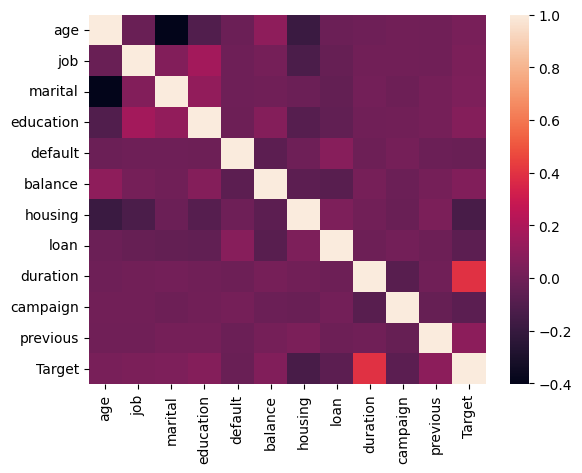

In [57]:
##Correlation Matrix
print(data1.corr())
sns.heatmap(data1.corr())

In [58]:
## split data into independent and dependent variables
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [59]:
## Split data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state  = True)

In [60]:
#Scale dataset
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [61]:
#Classifier
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [62]:
##Prediction
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [0 0]
 [1 0]
 [0 0]]


In [63]:
##accuracy
accuracy_score(y_test,y_pred)

0.8699460320268955